## Step 0: Import Libraries

First, we import the necessary Python libraries for data manipulation, visualization, preprocessing, and automated EDA.



In [71]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.dtypes.common import pandas_dtype
%matplotlib inline

# Libraries for Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


sns.set_style("whitegrid")



## Step 1: Load the Dataset

First, we'll load the BankChurners.csv file containing credit card customer data. This dataset comes from Kaggle and includes real-world banking information we'll use for churn prediction. I'm using pandas' read_csv() function for this purpose because it efficiently handles large datasets and provides flexibility for data type specifications.

In [9]:
# import csv file using pandas lib
data = pd.read_csv("credit-card_customers.csv")

data.head(10)

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,6/9/1979,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,5/28/1966,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,6/29/1978,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,6/23/1990,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,3/12/1975,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
5,3708105258,Existing Customer,43,3/6/1981,M,4,Unknown,Unknown,$120K +,Blue,...,2,2,33304.0,1833,31471.0,0.428,1448,29,0.381,0.055
6,3708108258,Existing Customer,32,8/6/1992,F,0,Graduate,Married,Less than $40K,Blue,...,1,0,2834.0,1418,1416.0,1.458,1598,39,0.773,0.500
7,3708109308,Existing Customer,37,7/4/1987,F,2,High School,Single,Less than $40K,Blue,...,2,2,5723.0,1873,3850.0,0.851,2732,63,0.853,0.327
8,3708110658,Existing Customer,55,7/9/1969,F,3,College,Single,Less than $40K,Blue,...,3,3,2679.0,2277,402.0,0.736,4943,85,0.735,0.850
9,3708113733,Existing Customer,52,5/29/1972,M,1,High School,Single,$60K - $80K,Blue,...,5,1,11898.0,2517,9381.0,0.745,15798,128,0.730,0.212


## Step 2: Understand the Dataset
Now that we’ve loaded the dataset, let’s dive deeper to understand its structure and patterns. In this step, we’ll explore the Credit Card Customers dataset by visualizing key aspects like the distribution of numerical features, the balance of the target variable `Attrition_Flag`, and correlations between features. This will help us identify any trends, imbalances, or relationships that might influence our modeling decisions later on.


###

##### This section explores the dataset by checking its structure, summary statistics, and missing values. It also analyzes the `Attrition_Flag` column to count how many customers are "Existing", "Attrited", or have unknown or missing labels.


In [10]:
print("Dataset Info:")
data.info()

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
data.isnull().sum()

import pandas as pd

existing_count = 0
attrited_count = 0
non_count = 0
unk_count = 0

for value in data['Attrition_Flag']:
    if pd.isna(value):
        non_count += 1
    elif value == 0 or value == 'Existing Customer':
        existing_count += 1
    elif value == 1 or value == 'Attrited Customer':
        attrited_count += 1
    else:
        unk_count += 1



print(f"Existing Customers: {existing_count}")
print(f"Attrited Customers: {attrited_count}")
print(f"Other/NaN Values: {non_count}")
print(f"Unk: {unk_count}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12126 entries, 0 to 12125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Number           12126 non-null  int64  
 1   Attrition_Flag            12026 non-null  object 
 2   Age                       12126 non-null  int64  
 3   Date_of_birth             12126 non-null  object 
 4   Gender                    11926 non-null  object 
 5   Dependent_count           12126 non-null  int64  
 6   Education_Level           11926 non-null  object 
 7   Marital_Status            12126 non-null  object 
 8   Income_Category           12126 non-null  object 
 9   Card_Category             11924 non-null  object 
 10  Months_on_book            12126 non-null  int64  
 11  Total_Relationship_Count  12126 non-null  int64  
 12  Months_Inactive_12_mon    12126 non-null  int64  
 13  Contacts_Count_12_mon     12126 non-null  int64

#### Results and Analysis

##### What the Code Did
The code checked the dataset to understand its structure:
- Showed dataset info, including column types and counts.
- Displayed summary statistics for numerical columns like `Age` and `Credit_Limit`.
- Identified missing values in columns like `Attrition_Flag` (100 missing), `Gender` (200 missing), and `Card_Category` (202 missing).
- Counted `Attrition_Flag` values: 9945 Existing Customers, 1981 Attrited Customers, 100 missing (NaN), and 100 unknown values.

#### What I Benefited from the Results
- I found missing values in `Attrition_Flag`, `Gender`, and `Card_Category`, which I need to handle before modeling.
- I confirmed the dataset is imbalanced (more Existing Customers than Attrited), so I’ll need to balance it later.
- I noticed some numerical columns like `Credit_Limit` have a wide range, suggesting I might need to apply scaling or transformation.
This helps me plan the next steps for cleaning and preparing the data.
##### - we found less than 12126 in
1. Attrition_Flag,
2. Gender,
3. Education_level,
4. Card_category
- we found data type of Date is object we need to convert this data type to date time

#

#### Display dataset info to check column types and missing values.
- Show summary statistics to understand the distribution of numerical columns.
- Count missing values in each column.

In [11]:
missing_Value = data.isnull().sum()
missing_Value[missing_Value > 0]

Attrition_Flag     100
Gender             200
Education_Level    200
Card_Category      202
dtype: int64

#### The code identified columns with missing values in the dataset:
- It counted missing entries in each column.
- It displayed only the columns with missing values: `Attrition_Flag` (100 missing), `Gender` (200 missing), `Education_Level` (200 missing), and `Card_Category` (202 missing).

In [12]:
#
#     View summary statistics of the numerical columns
#          <- what is numerical data ->
#     Numerical data is a data type expressed in numbers, rather than natural language  description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.
# type of Numerical data (Discrete Data , Continuous Data , Interval Data , Ratio Data)
#

data.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer_Number,12126.0,3.742948e+09,3.786269e+07,3.708092e+09,3.713645e+09,3.719272e+09,3.779080e+09,3.828353e+09
Age,12126.0,4.672967e+01,1.250832e+01,5.000000e+00,4.100000e+01,4.600000e+01,5.200000e+01,1.200000e+02
Dependent_count,12126.0,2.344302e+00,1.289627e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,12126.0,3.584257e+01,7.959591e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,12126.0,3.810407e+00,1.552042e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,12126.0,2.347188e+00,1.008596e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,12126.0,2.452251e+00,1.104960e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,12126.0,8.268303e+03,8.964527e+03,0.000000e+00,2.454500e+03,4.182000e+03,1.057200e+04,3.451600e+04
Total_Revolving_Bal,12126.0,1.178020e+03,8.203924e+02,0.000000e+00,4.650000e+02,1.293000e+03,1.800000e+03,2.517000e+03
Avg_Open_To_Buy,12126.0,7.231968e+03,8.986507e+03,3.000000e+00,1.197000e+03,3.224000e+03,9.575000e+03,3.451600e+04


In [13]:
# View summary statistics of the Categorical columns
# What is Categorical Data?
# Categorical data, also known as qualitative data, is a type of data that represents discrete, distinct categories or groups. Unlike numerical data, which can be measured and quantified, categorical data fall into specific, non-numeric categories. Categorical data are often used to classify items or observations into different groups based on particular characteristics or attributes.

## type of Numerical data (Nominal Data(type) , Ordinal Data(fav))


data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,12026,3,Existing Customer,9945
Date_of_birth,12126,5741,3/16/1978,11
Gender,11926,2,F,6427
Education_Level,11926,7,Graduate,3706
Marital_Status,12126,4,Married,5719
Income_Category,12126,6,Less than $40K,4348
Card_Category,11924,4,Blue,11131


# Step 3: Data Cleaning

After exploring the dataset, we need to clean it to make it ready for modeling. Our goal is to predict customer churn using the `Attrition_Flag` column, but we’ve found missing values in several columns, including the target variable. In this step, we’ll handle missing values, drop irrelevant columns, and encode categorical variables to numerical format. We’ll also ensure all data types are suitable for modeling. This cleaning process will ensure our dataset is efficient and ready for the next steps like feature engineering and model training.

### Objective
This code cleans the dataset by:
- Checking and removing duplicate rows.
- Dropping irrelevant columns like `Date_of_birth`.
This ensures the data is clean and focused for modeling.

In [14]:
#  Check how many duplicated rows
duplicated_rows = data[data.duplicated()]
print(f" Number of duplicated rows: {duplicated_rows.shape[0]}")

#  (Optional) Show some duplicated rows to inspect
print(duplicated_rows.head())

#  Drop duplicated rows
data.drop_duplicates(inplace=True)

# Confirm again after drop
print(f" Remaining duplicated rows after cleaning: {data.duplicated().sum()}")
print(f" New dataset shape: {data.shape}")

# Drop irrelevant columns
columns_to_drop = ['Date_of_birth']
data = data.drop(columns=columns_to_drop)
print("\nDropped irrelevant columns:", columns_to_drop)
print("New dataset shape after dropping columns:", data.shape)


 Number of duplicated rows: 401
     Customer_Number     Attrition_Flag  Age Date_of_birth Gender  \
33        3708164958  Attrited Customer   39      2/3/1985      F   
59        3708222783  Existing Customer   38     1/12/1986      F   
107       3708313233  Existing Customer   50     1/22/1974      F   
125       3708352083  Existing Customer   31     6/15/1993      F   
146       3708394158  Attrited Customer   45     1/30/1979      F   

     Dependent_count Education_Level Marital_Status Income_Category  \
33                 2        Graduate         Single  Less than $40K   
59                 3        Graduate        Married  Less than $40K   
107                2        Graduate        Married  Less than $40K   
125                1         College       Divorced  Less than $40K   
146                3      Uneducated        Married  Less than $40K   

    Card_Category  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
33           Blue  ...                       3       

## Results and Analysis

### What the Code Did
The code cleaned the dataset by:
- Found and reported 401 duplicated rows.
- Displayed a sample of the duplicated rows for inspection.
- Removed all duplicated rows, leaving no duplicates.
- Dropped the `Date_of_birth` column as it’s not relevant for predicting attrition.
- Updated the dataset shape to (11725, 21) after cleaning.

### What I Benefited from the Results
- I removed 401 duplicate entries, ensuring each customer is counted once, which avoids bias in the model.
- Dropping `Date_of_birth` simplified the dataset, focusing on features that impact attrition like `Credit_Limit` or `Total_Trans_Ct`.
- The new shape (11725 rows, 21 columns) confirms the cleaning worked.

#

## Missing Values Analysis

### Objective
This code checks for missing values in the dataset by:
- Counting missing values in each column.
- Calculating the percentage of missing values for better insight.
- Creating a report showing only columns with missing data, sorted by the highest number of missing values.
This helps prioritize which columns need handling before modeling.

In [15]:
# Check for missing values in the dataset

#  Count of missing values per column
missing_values = data.isnull().sum()

#  Combine with percentage for better insight
missing_percentage = (missing_values / len(data)) * 100

#  Create a clean table for only columns with missing data
missing_report = pd.DataFrame({
    'Missing_Values': missing_values,
    'Percentage (%)': missing_percentage
})

#  Filter out only columns with missing values
missing_report = missing_report[missing_report['Missing_Values'] > 0]

#  Sort by most missing first for prioritization
missing_report.sort_values(by='Missing_Values', ascending=False, inplace=True)

#  Show the final clean and insightful missing values report
print(missing_report)


                 Missing_Values  Percentage (%)
Card_Category               202        1.722814
Gender                      200        1.705757
Education_Level             200        1.705757
Attrition_Flag              100        0.852878


### What the Code Did
The code analyzed missing values in the dataset:
- Counted missing values and calculated their percentage for each column.
- Created a sorted report showing columns with missing data: `Card_Category` (202 missing, 1.72%), `Gender` (200 missing, 1.71%), `Education_Level` (200 missing, 1.71%), and `Attrition_Flag` (100 missing, 0.85%).

#

# Step 4: Encoding Categorical Variables
Categorical variables like `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, and `Card_Category` need to be converted to numerical values because machine learning models can only process numerical inputs. Categorical data can be nominal (no order, e.g., `Gender`) or ordinal (has order, e.g., `Education_Level`). In this dataset, most categorical columns are nominal, so we’ll use **Label Encoding** to convert each category to a unique integer. This method is suitable since our models can handle these encoded values effectively, and we’ll ensure the target variable `Attrition_Flag` is also encoded as 0 and 1 for binary classification.

### Objective
This code prepares the dataset by:
- Removing rows with missing target values (`Attrition_Flag`).
- Cleaning and encoding the target variable into binary (0/1).
- Handling missing values in categorical columns (`Gender`, `Education_Level`, etc.) and encoding them into numerical values.
This ensures the data is clean and ready for modeling.

In [16]:
# Step 1: Remove rows with missing target values
initial_row_count = data.shape[0]
data = data.dropna(subset=['Attrition_Flag']).copy()
print(f"\n[Target Processing] Removed {initial_row_count - data.shape[0]} rows with missing target values")

# Step 2: Convert to string and clean values
data['Attrition_Flag'] = data['Attrition_Flag'].astype(str).str.strip().str.title()

# Define expected valid values
valid_values = ['Existing Customer', 'Attrited Customer']
invalid_values = set(data['Attrition_Flag']) - set(valid_values)

data = data[data['Attrition_Flag'] != 'Unknown']


# Handle any unexpected values
if invalid_values:
    print(f"[Target Processing] Found {len(invalid_values)} unexpected values: {invalid_values}")
    data = data[data['Attrition_Flag'].isin(valid_values)]

# Step 3: Encode target variable (0/1)
value_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
data['Attrition_Flag'] = data['Attrition_Flag'].map(value_mapping).astype('int8')

print("[Target Processing] Final encoding scheme:", value_mapping)
print("[Target Processing] Value distribution after encoding:\n", data['Attrition_Flag'].value_counts())

categorical_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

# Initialize encoder
encoder = LabelEncoder()

for column in categorical_columns:
    # Step 1: Convert to string and fill missing values
    data[column] = data[column].astype(str)
    if data[column].isin(['nan', 'None', 'NA']).any():
        most_frequent_value = data[column].mode()[0]
        missing_count = data[column].isin(['nan', 'None', 'NA']).sum()
        data[column] = data[column].replace(['nan', 'None', 'NA'], most_frequent_value)
        print(f"\n[Categorical Processing] Filled {missing_count} missing values in {column} with: {most_frequent_value}")

    # Step 2: Convert categories to numerical codes
    data[column] = encoder.fit_transform(data[column])
    print(f"[Categorical Processing] Encoded {column} with mapping: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")

print("\n[Final Validation] Missing values check:")
print(data.isnull().sum())

print("\n[Final Validation] Final dataset shape:", data.shape)
print("[Final Validation] Sample of processed data:\n", data.head(3))



[Target Processing] Removed 100 rows with missing target values
[Target Processing] Found 1 unexpected values: {'Unknown'}
[Target Processing] Final encoding scheme: {'Existing Customer': 0, 'Attrited Customer': 1}
[Target Processing] Value distribution after encoding:
 Attrition_Flag
0    9600
1    1925
Name: count, dtype: int64

[Categorical Processing] Filled 200 missing values in Gender with: F
[Categorical Processing] Encoded Gender with mapping: {'F': 0, 'M': 1}

[Categorical Processing] Filled 200 missing values in Education_Level with: Graduate
[Categorical Processing] Encoded Education_Level with mapping: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
[Categorical Processing] Encoded Marital_Status with mapping: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
[Categorical Processing] Encoded Income_Category with mapping: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than

### What the Code Did
The code processed the target and categorical data:
- Removed 100 rows with missing `Attrition_Flag` values.
- Cleaned `Attrition_Flag`, removed unexpected value ('Unknown'), and encoded it (0 for Existing, 1 for Attrited).
- Found 9600 Existing Customers and 1925 Attrited Customers.
- Filled missing values in `Gender` (200), `Education_Level` (200), and `Card_Category` (202) with the most frequent values (e.g., 'F' for Gender).
- Encoded categorical columns (`Gender`, `Education_Level`, etc.) into numerical values.
- Confirmed no missing values remain, with a final shape of (11525, 21).

In [17]:
print("Dataset Info:")
data.info()

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
data.isnull().sum()

import pandas as pd

existing_count = 0
attrited_count = 0
non_count = 0
unk_count = 0

for value in data['Attrition_Flag']:
    if pd.isna(value):
        non_count += 1
    elif value == 0 or value == 'Existing Customer':
        existing_count += 1
    elif value == 1 or value == 'Attrited Customer':
        attrited_count += 1
    else:
        unk_count += 1



print(f"Existing Customers: {existing_count}")
print(f"Attrited Customers: {attrited_count}")
print(f"Other/NaN Values: {non_count}")
print(f"Unk: {unk_count}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11525 entries, 0 to 12125
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Number           11525 non-null  int64  
 1   Attrition_Flag            11525 non-null  int8   
 2   Age                       11525 non-null  int64  
 3   Gender                    11525 non-null  int64  
 4   Dependent_count           11525 non-null  int64  
 5   Education_Level           11525 non-null  int64  
 6   Marital_Status            11525 non-null  int64  
 7   Income_Category           11525 non-null  int64  
 8   Card_Category             11525 non-null  int64  
 9   Months_on_book            11525 non-null  int64  
 10  Total_Relationship_Count  11525 non-null  int64  
 11  Months_Inactive_12_mon    11525 non-null  int64  
 12  Contacts_Count_12_mon     11525 non-null  int64  
 13  Credit_Limit              11525 non-null  float64
 1

### Identifying and Handling Outliers


### Objective
This code identifies columns with outliers in the dataset using the Interquartile Range (IQR) method. It will:
- Analyze numerical columns to detect values outside 1.5 * IQR from the quartiles.
- Return a list of columns containing outliers.
This step helps us understand which features might need outlier handling before modeling.

In [18]:
# Function to find columns with outliers using the IQR method
def find_outliers_columns(df):
    outliers_columns = []
    for column in df.select_dtypes(include=[np.number]):
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        if ((df[column] < lower_bound) | (df[column] > upper_bound)).any():
            outliers_columns.append(column)
    return outliers_columns


# Use the function to find columns with outliers
outliers_columns_list = find_outliers_columns(data)
print("Columns with outliers:", outliers_columns_list)

Columns with outliers: ['Attrition_Flag', 'Age', 'Card_Category', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']



### What the Code Did
The code detected outliers in numerical columns using the IQR method:
- Checked each numerical column for values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
- Identified columns with outliers: `Age`, `Card_Category`, `Months_on_book`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Avg_Open_To_Buy`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1`.
- I found 11 columns with outliers, which could affect model performance if not handled.

#


### Objective
This code caps outliers in selected numerical columns using the Interquartile Range (IQR) method. It will:
- Define upper and lower bounds based on 1.5 * IQR for each column.
- Cap values outside these bounds to the nearest bound.
- Update the dataset and show summary statistics to verify the changes.
This step ensures outliers are managed without losing data, improving model stability.

In [19]:
# Function to Cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Columns to check for outliers
columns_to_check = ['Age', 'Months_on_book', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy',
                    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1']

# cap outliers for each selected column
for col in columns_to_check:
    data_clean = cap_outliers(data, col)

# Display the data summary after cap outliers
data_clean.describe()


,Customer_Number,Attrition_Flag,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.152500e+04,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.00000,11525.000000,11525.000000,...,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000,11525.000000
mean,3.742594e+09,0.167028,46.325987,0.461345,2.348286,3.065597,1.457701,2.86256,0.177787,35.883471,...,2.317961,2.456529,7736.057527,1153.775618,6750.859826,0.750305,3945.557570,64.771106,0.700748,0.271899
std,3.779671e+07,0.373017,8.880892,0.498525,1.290097,1.816571,0.735771,1.50823,0.690009,7.739881,...,0.928435,1.025585,7205.055944,819.549639,7261.418737,0.186562,2181.395608,23.662292,0.198008,0.275587
min,3.708092e+09,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,17.500000,...,0.500000,0.500000,0.000000,0.000000,3.000000,0.281500,510.000000,10.000000,0.220500,0.000000
25%,3.713579e+09,0.000000,41.000000,0.000000,1.000000,2.000000,1.000000,1.00000,0.000000,31.000000,...,2.000000,2.000000,2488.000000,0.000000,1361.000000,0.628000,2142.000000,45.000000,0.579000,0.000000
50%,3.719141e+09,0.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.00000,0.000000,36.000000,...,2.000000,2.000000,4409.000000,1267.000000,3472.000000,0.735000,3882.000000,67.000000,0.700000,0.172000
75%,3.778954e+09,0.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.00000,0.000000,40.000000,...,3.000000,3.000000,10979.000000,1781.000000,9959.000000,0.859000,4740.000000,81.000000,0.818000,0.497000
max,3.828353e+09,1.000000,68.500000,1.000000,5.000000,6.000000,3.000000,5.00000,3.000000,53.500000,...,4.500000,4.500000,23715.500000,2517.000000,22856.000000,1.205500,8637.000000,135.000000,1.176500,0.999000


## Data Export for Power BI


In [34]:
# Export the cleaned data to Excel for further analysis in Power BI
import openpyxl
data.to_excel("Data_clean.xlsx", engine='openpyxl', index=False)
print("Data exported to Data_clean.xlsx successfully!")

Data exported to Data_clean.xlsx successfully!


In [35]:
data_cleaned = pd.read_excel("Data_clean.xlsx")

columns_to_drop = ['Customer_Number']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)
print("\nDropped irrelevant columns:", columns_to_drop)
print("New dataset shape after dropping columns:", data_cleaned.shape)

print("Dataset Info:")
data_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(data_cleaned.describe())

# Check for missing values
print("\nMissing Values:")
data_cleaned.isnull().sum()

data_cleaned.head()




Dropped irrelevant columns: ['Customer_Number']
New dataset shape after dropping columns: (11525, 20)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11525 entries, 0 to 11524
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            11525 non-null  int64  
 1   Age                       11525 non-null  float64
 2   Gender                    11525 non-null  int64  
 3   Dependent_count           11525 non-null  int64  
 4   Education_Level           11525 non-null  int64  
 5   Marital_Status            11525 non-null  int64  
 6   Income_Category           11525 non-null  int64  
 7   Card_Category             11525 non-null  int64  
 8   Months_on_book            11525 non-null  float64
 9   Total_Relationship_Count  11525 non-null  int64  
 10  Months_Inactive_12_mon    11525 non-null  float64
 11  Contacts_Count_12_mon     11525 non-null  float64
 12 

,Attrition_Flag,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45.0,0,3,3,1,4,0,36.0,4,3.0,3.0,3544.0,1661,1883.0,0.8310,8637,111,0.7340,0.469
1,1,58.0,1,0,6,2,1,0,45.0,3,1.0,3.0,3421.0,2517,904.0,0.9920,992,21,0.4000,0.736
2,1,46.0,1,3,1,0,3,0,38.0,6,3.0,3.0,8258.0,1771,6487.0,0.2815,1447,23,0.2205,0.214
3,0,34.0,0,2,5,2,4,0,24.0,6,2.0,2.0,1438.3,0,1438.3,0.8270,3940,82,0.9520,0.000
4,0,49.0,0,2,5,1,5,0,41.0,3,4.5,2.0,3128.0,749,2379.0,0.5980,4369,59,0.7350,0.239


# STEP 6: Exploratory Data Analysis (EDA) – Numerical Feature Distributions, Outliers, and Correlations


## 6.1 Distribution of Numeric Features (Histograms)
#### Objective
This code visualizes the distribution of numeric columns in the cleaned dataset using histograms. It will:
- Create histograms with 30 bins for each numeric column.
- Help identify patterns, skewness, or unusual distributions.
This step provides insights into the data's shape for further preprocessing or modeling decisions.


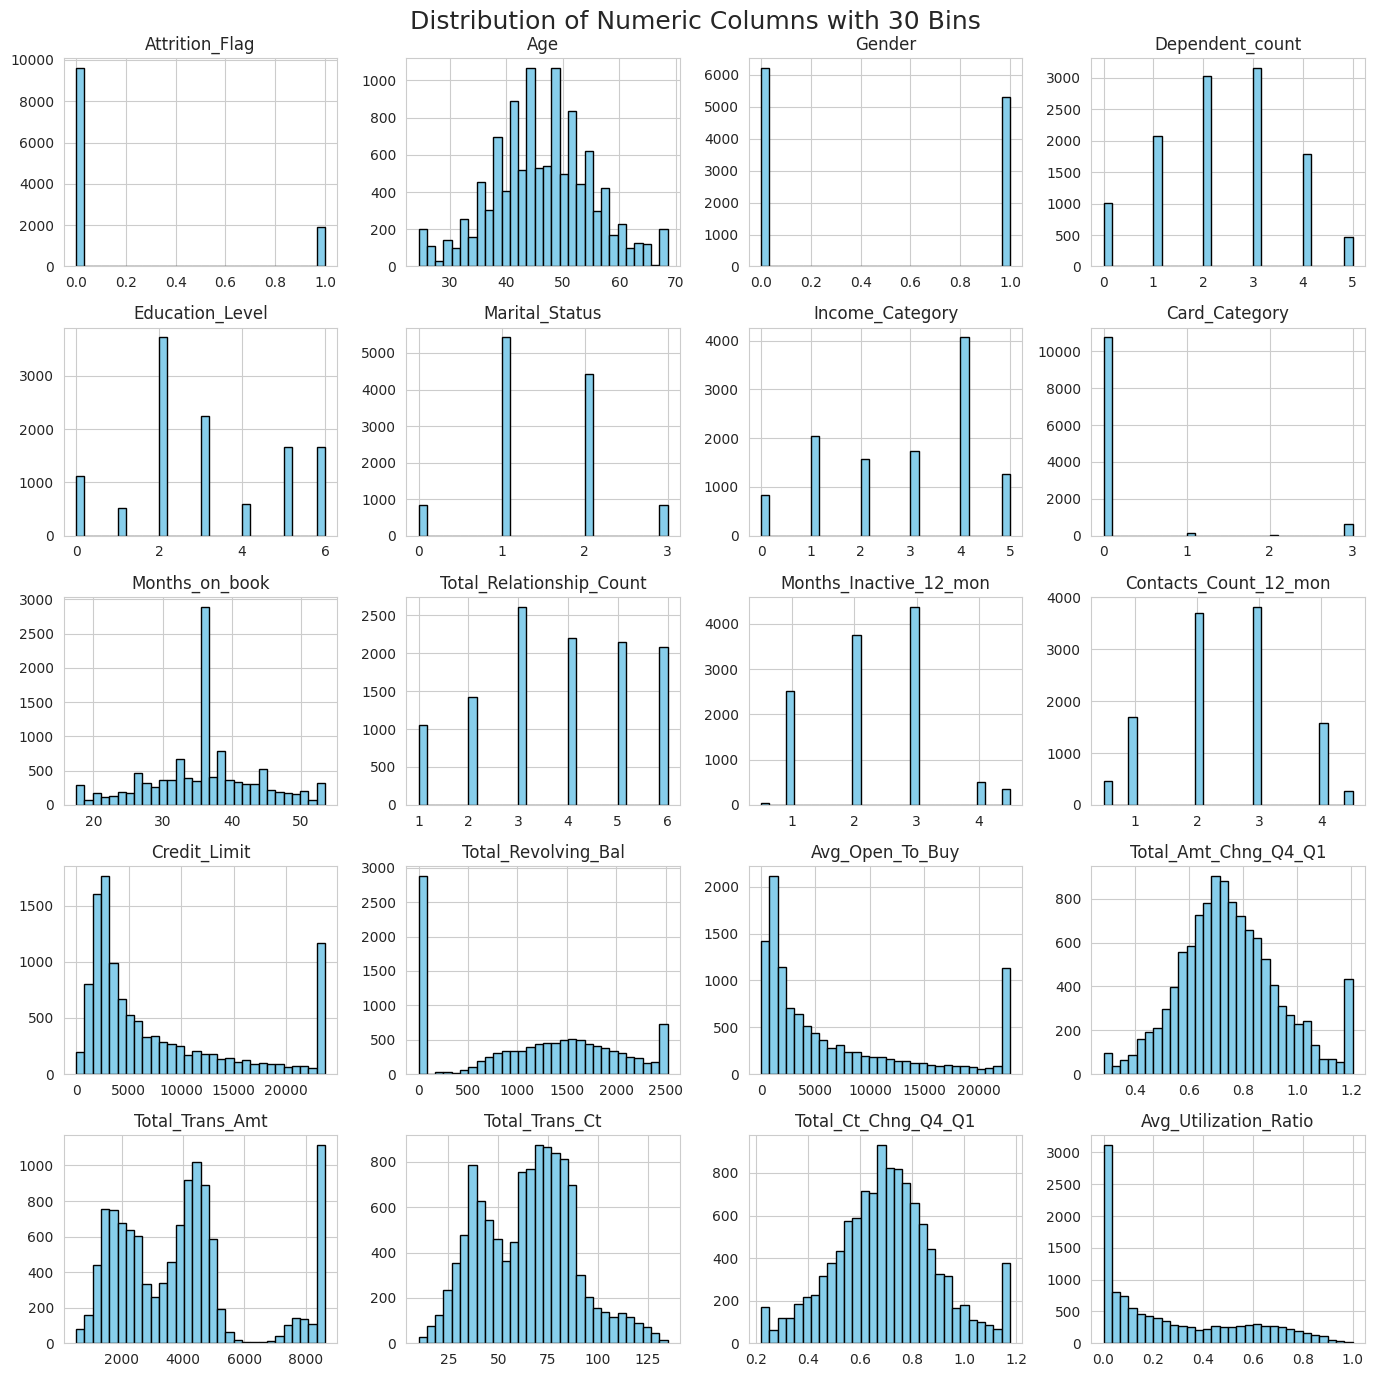

In [22]:
data_cleaned.hist(figsize=(14, 14), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Columns with 30 Bins", fontsize=18)
plt.tight_layout()
plt.show()


## 6.2  Boxplot Analysis of Numeric Features

#### Objective
This code creates boxplots for all numeric columns in the cleaned dataset to:
- Visualize the distribution, spread, and outliers of each numeric feature.
- Use a grid layout to display multiple boxplots for better comparison.
This helps identify outliers and understand data variability before modeling.

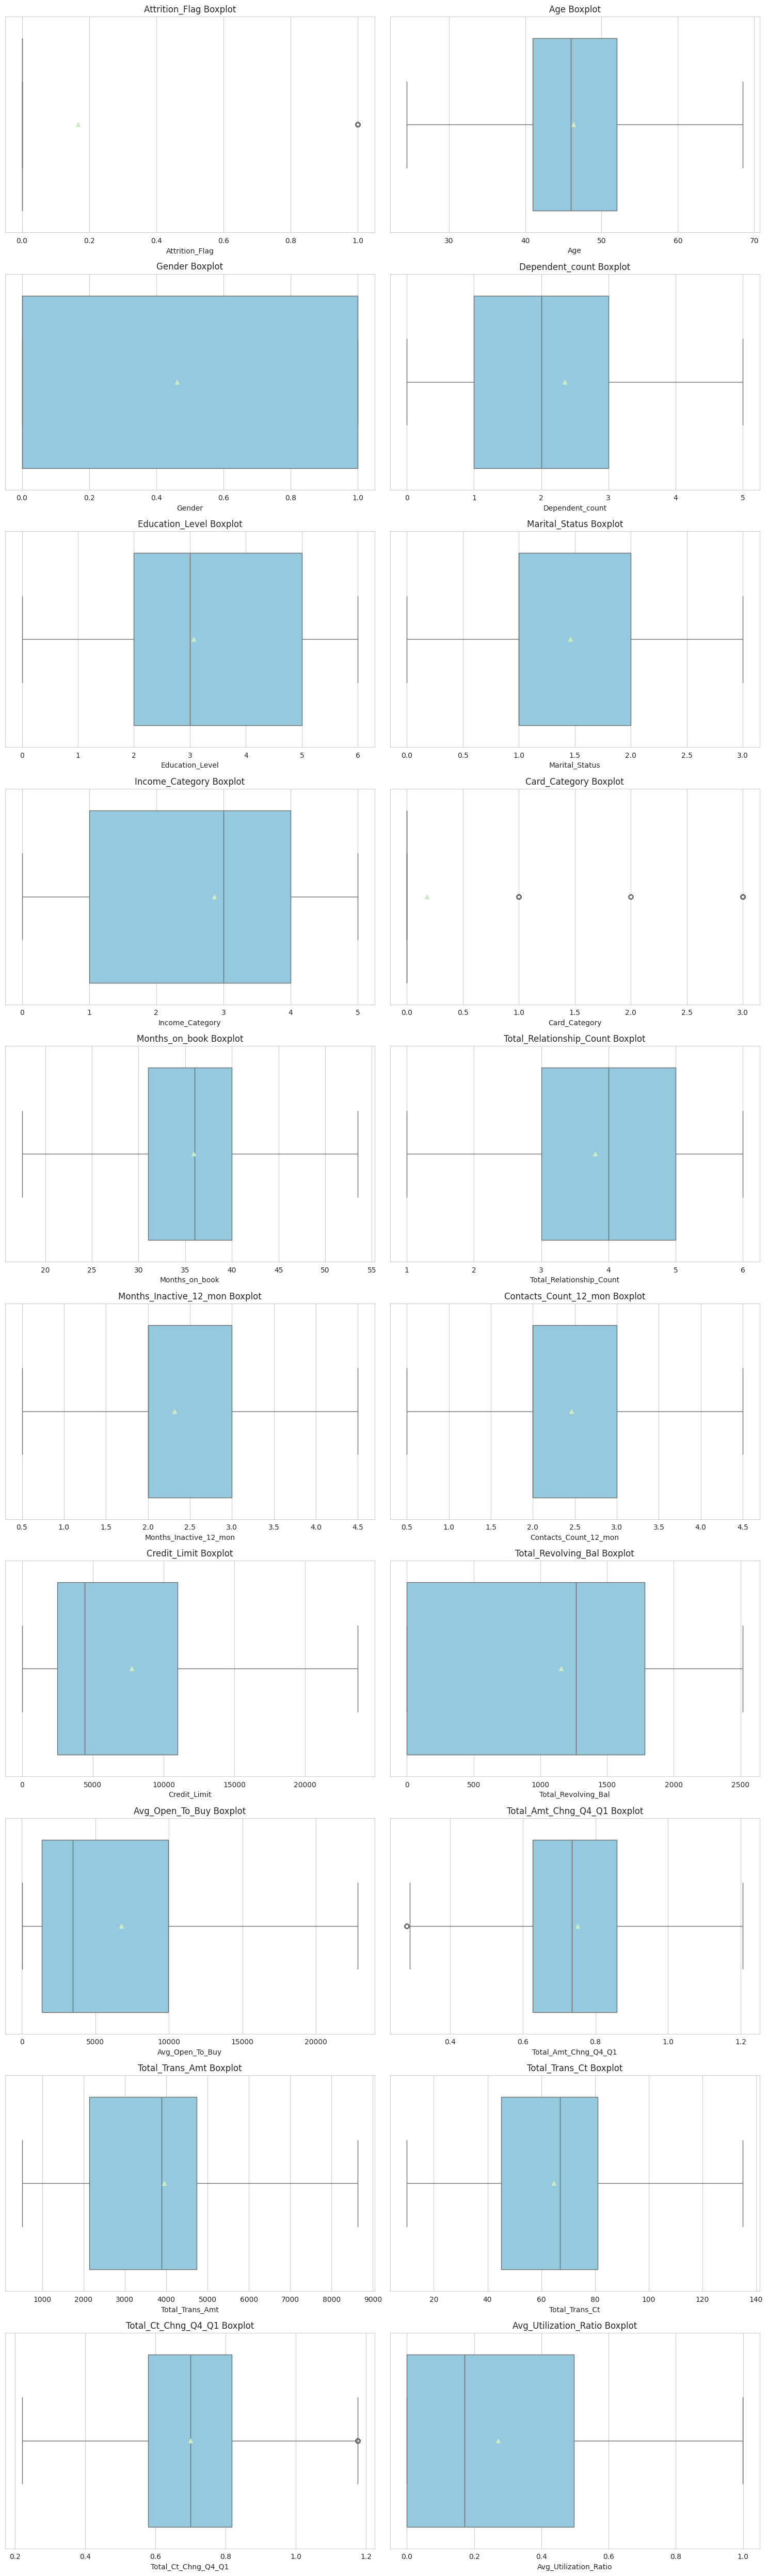

In [23]:
numeric_cols = data_cleaned.select_dtypes(include="number").columns.tolist()
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
plt.subplots_adjust(hspace=0.6)
sns.set_palette("Pastel1")
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data_cleaned[col], color="skyblue", ax=axes[i], showmeans=True)
    axes[i].set_title(f"{col} Boxplot")
plt.tight_layout()
plt.show()



## Results and Analysis


### What I Benefited from the Results
- I identified columns with remaining outliers ( `Credit_Limit`, `Total_Trans_Amt`), even after capping.
- Columns like `Age` and `Months_on_book` look balanced with no extreme outliers.
- The spread in `Avg_Utilization_Ratio` shows many values near 0, indicating potential sparsity.

## 6.3  Comparative Boxplot Analysis by Attrition Flag

#### Objective
This code creates boxplots for numeric columns, grouped by `Attrition_Flag`, to:
- Compare the distribution of numeric features between Existing (0) and Attrited (1) customers.
- Identify differences in medians, spreads, and outliers across the two groups.
This helps understand which features might influence customer attrition.

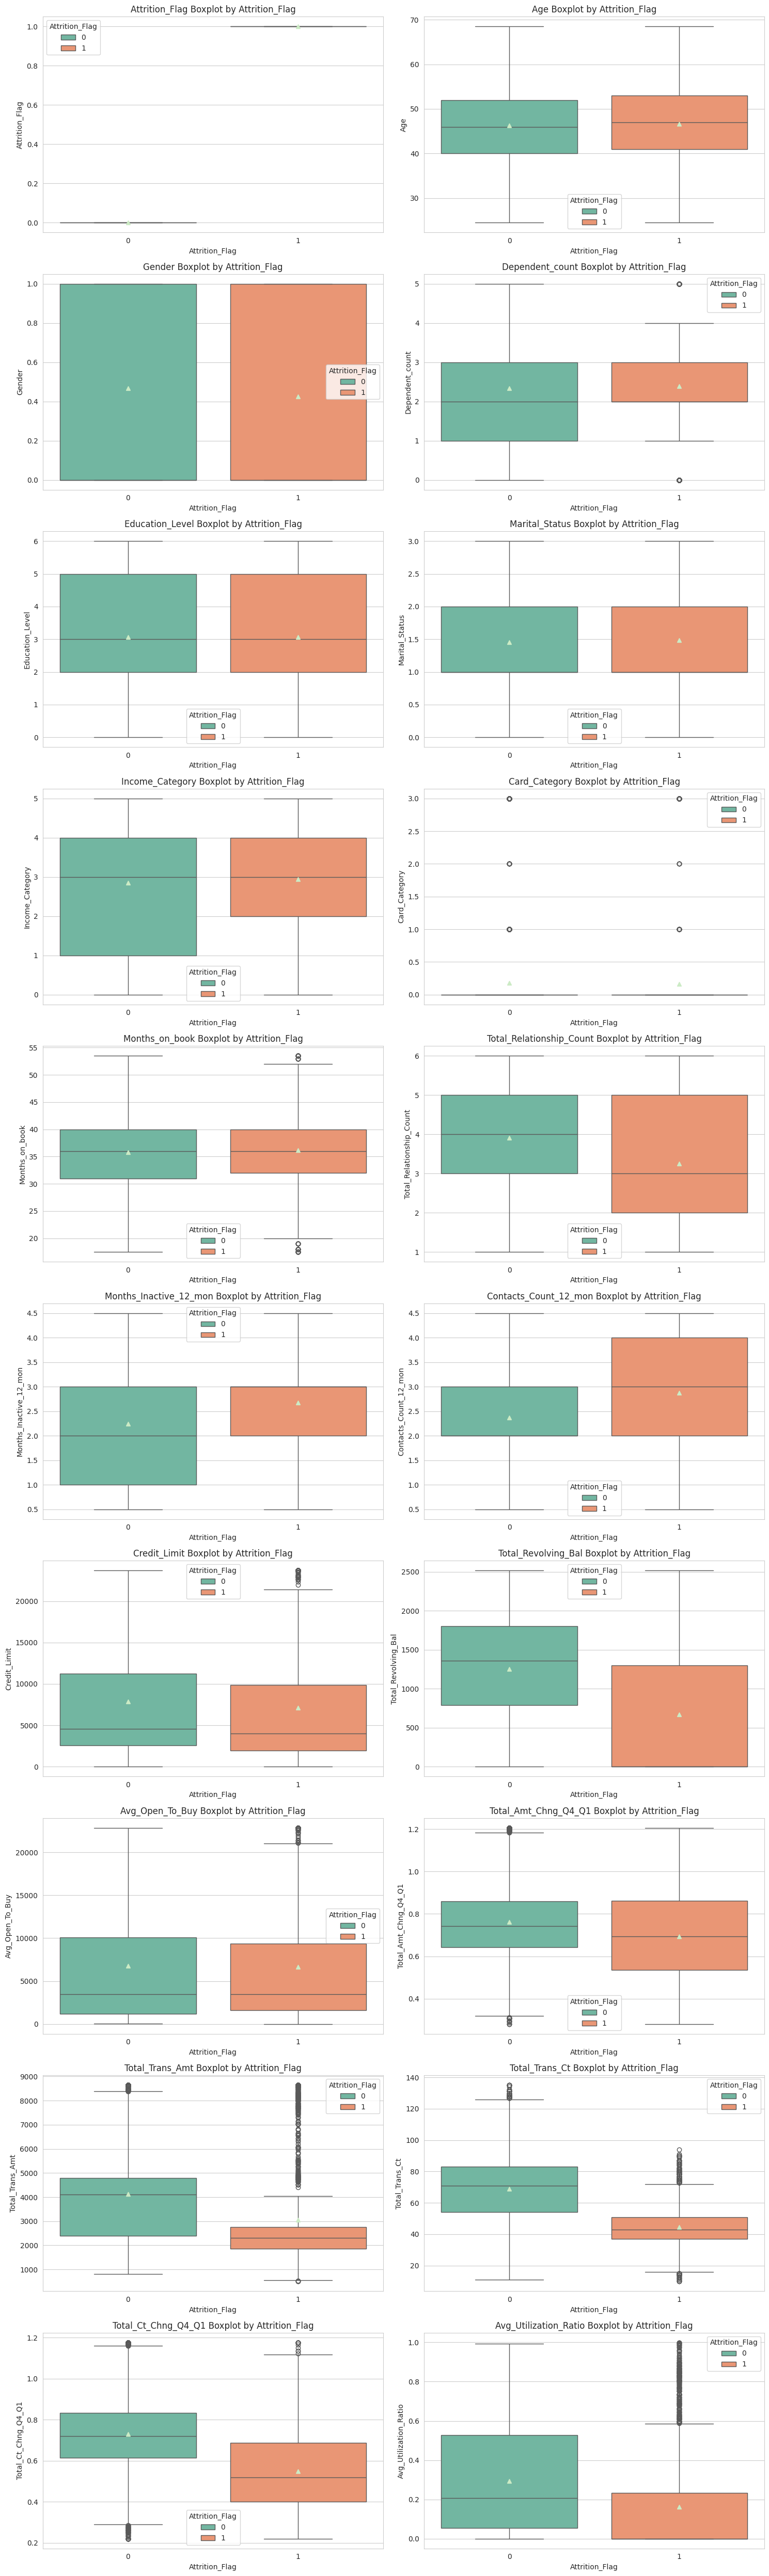

In [24]:
# Select numerical columns
numeric_cols = data_cleaned.select_dtypes(include="number").columns.tolist()

# Set the number of rows and columns based on the number of plots needed
n_cols = 2  # Number of columns per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
plt.subplots_adjust(hspace=0.6)

# Plot boxplots for each numerical column, grouped by Attrition_Flag
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Attrition_Flag', y=col, data=data_cleaned, ax=axes[i // n_cols, i % n_cols], showmeans=True,
                palette="Set2", hue='Attrition_Flag')
    axes[i // n_cols, i % n_cols].set_title(f"{col} Boxplot by Attrition_Flag")

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Tight layout for better spacing
plt.tight_layout()
plt.show()



#### What I Benefited from the Results
- I found that `Total_Trans_Ct` and `Total_Trans_Amt` are lower for Attrited customers, suggesting these features strongly influence attrition.
- `Months_Inactive_12_mon` is higher for Attrited customers, indicating inactivity might predict churn.
- `Credit_Limit` and `Avg_Open_To_Buy` show similar distributions for both groups, so they might not be as predictive.
- This helps me prioritize features like `Total_Trans_Ct` for modeling and consider further preprocessing (e.g., scaling) for balanced features.

## 6.4  Correlation Heatmap Analysis


#### Objective
This code analyzes the correlation between numeric columns and the target variable `Attrition_Flag`. It will:
- Keep `Attrition_Flag` in the dataset to measure its relationship with other features.
- Create a correlation heatmap to visualize all correlations.
- Highlight the top correlations with `Attrition_Flag` for better insight.
This helps identify the most influential features for predicting customer attrition.

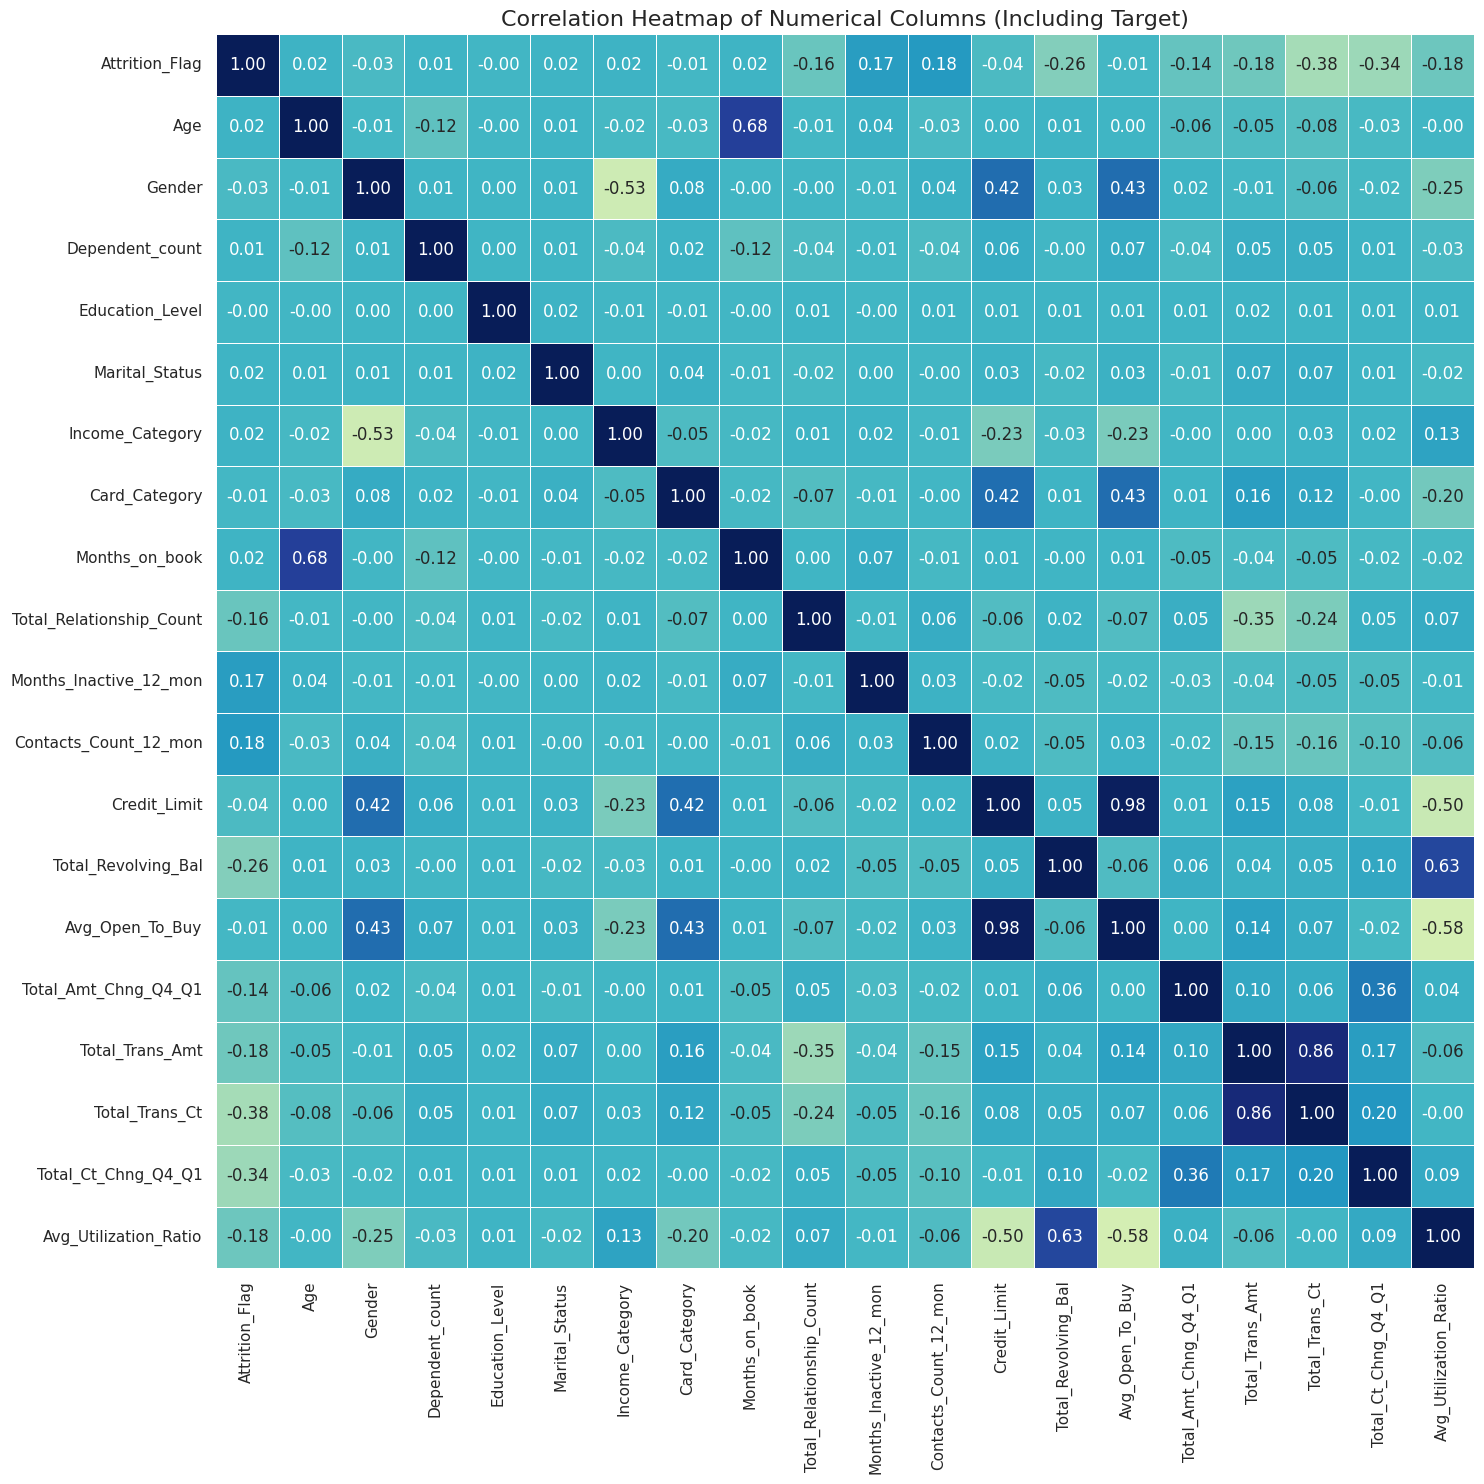

In [27]:

data_corr = data_cleaned.copy()

# Select only numerical columns including the target
numeric_data = data_corr.select_dtypes(include=[np.number])

# Plot the correlation heatmap
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns (Including Target)", fontsize=16)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

#### What the Code Did
The code generated a correlation heatmap for all numeric columns, including `Attrition_Flag`:
- Mapped `Attrition_Flag` to 0 (Existing Customer) and 1 (Attrited Customer).
- Displayed a heatmap showing correlation coefficients between all numeric features and the target.
- Highlighted strong positive or negative correlations with `Attrition_Flag`.

#### What I Benefited from the Results (Insights)
- **Strong Negative Correlations with Attrition_Flag**:
  - `Total_Trans_Ct` (-0.38) and `Total_Trans_Amt` (-0.38) show a strong negative correlation, meaning lower transaction counts and amounts are linked to higher attrition (customers leaving).
  - `Total_Revolving_Bal` (-0.26) suggests customers with lower revolving balances are more likely to attrite.
  - `Avg_Utilization_Ratio` (-0.25) indicates lower credit utilization is associated with attrition.
- **Moderate Negative Correlations**:
  - `Total_Ct_Chng_Q4_Q1` (-0.34) and `Total_Amt_Chng_Q4_Q1` (-0.18) imply a decrease in transaction activity over time predicts attrition.
  - `Contacts_Count_12_mon` (-0.18) shows more customer contacts might reduce attrition risk.
- **Weak or No Correlation**:
  - `Age` (0.02) and `Gender` (-0.03) have very weak correlations, suggesting they don’t strongly influence attrition.
  - `Credit_Limit` (0.04) and `Avg_Open_To_Buy` (0.01) show minimal impact.
- **Key Takeaways**:
  - Features like `Total_Trans_Ct`, `Total_Trans_Amt`, and `Total_Ct_Chng_Q4_Q1` are critical predictors of attrition and should be prioritized in modeling.
  - The heatmap confirms multicollinearity (e.g., `Total_Trans_Ct` and `Total_Trans_Amt` are highly correlated at 0.80), so I might need to handle this during feature selection.
  - This guides me to focus on transaction-related features and consider balancing the dataset due to the negative correlations with attrition.

The variables **Total_Trans_Ct**, **Total_Ct_Chng_Q4_Q1** and **Total_Revolving_Bal** are the top 3 features that most directly and negatively influence the churn of customers. In other words, the higher the value of these 3 variables mentioned, the lower the churn rate of these customers.


In the other analysis spectrum, the **Contacts_Count_12_mon** and **Months_Inactive_12_mon** variables are the 2 main features that have a positive correlation with the churn target variable. This means that the higher the value of these 2 mentioned variables, the higher the churn rate of the public.

In [36]:
existing_customers = data_cleaned[data_cleaned['Attrition_Flag'] == 0]
attrited_customers = data_cleaned[data_cleaned['Attrition_Flag'] == 1]

print(f" {len(existing_customers)}")
print(f" {len(attrited_customers)}")

print("Dataset Info:")
data_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(data_cleaned.describe())

# Check for missing values
print("\nMissing Values:")
data_cleaned.isnull().sum()

import pandas as pd

existing_count = 0
attrited_count = 0
non_count = 0
unk_count = 0

for value in data_cleaned['Attrition_Flag']:
    if pd.isna(value):
        print(value)
    elif value == 0 or value == 'Existing Customer':
        existing_count += 1
    elif value == 1 or value == 'Attrited Customer':
        attrited_count += 1
    else:
        print(value)



print(f"Existing Customers: {existing_count}")
print(f"Attrited Customers: {attrited_count}")
print(f"Other/NaN Values: {non_count}")
print(f"Unk: {unk_count}")

 9600
 1925
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11525 entries, 0 to 11524
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            11525 non-null  int64  
 1   Age                       11525 non-null  float64
 2   Gender                    11525 non-null  int64  
 3   Dependent_count           11525 non-null  int64  
 4   Education_Level           11525 non-null  int64  
 5   Marital_Status            11525 non-null  int64  
 6   Income_Category           11525 non-null  int64  
 7   Card_Category             11525 non-null  int64  
 8   Months_on_book            11525 non-null  float64
 9   Total_Relationship_Count  11525 non-null  int64  
 10  Months_Inactive_12_mon    11525 non-null  float64
 11  Contacts_Count_12_mon     11525 non-null  float64
 12  Credit_Limit              11525 non-null  float64
 13  Total_Revolving_Bal       11525 non

# Step 6: Data Preprocessing Pipeline for model building

## Final Data Preprocessing for Model Building

### Objective
This code prepares the dataset for machine learning by:
- Encoding categorical columns (`Income_Category`, `Education_Level`, `Card_Category`) using Label Encoding.
- Dropping original categorical columns after encoding.
- Creating dummy variables for `Gender` and `Marital_Status` using One-Hot Encoding.
- Splitting the dataset into features (X) and target (y).
- Scaling the features using StandardScaler to standardize the data.
- Splitting the data into training (80%) and test (20%) sets with stratification.
This ensures the data is fully numerical, scaled, and ready for modeling.

In [37]:
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
data_cleaned['Income_Category_Labelled'] = le.fit_transform(data_cleaned['Income_Category'])
data_cleaned['Education_Level_Labelled'] = le.fit_transform(data_cleaned['Education_Level'])
data_cleaned['Card_Category_Labelled'] = le.fit_transform(data_cleaned['Card_Category'])

# Drop original categorical columns
data_cleaned = data_cleaned.drop(['Education_Level', 'Income_Category', 'Card_Category'], axis=1)

# Create dummy variables for Gender and Marital_Status
new_df = pd.get_dummies(data_cleaned, columns=['Gender', 'Marital_Status'], drop_first=True, dtype='int')

# Split the dataset into features (X) and target (y)
X = new_df.drop('Attrition_Flag', axis=1)
y = new_df['Attrition_Flag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=20, stratify=y)


### Results and Analysis

### What the Code Did
The code completed the final preprocessing steps:
- Encoded `Income_Category`, `Education_Level`, and `Card_Category` into numerical values using Label Encoding.
- Dropped the original categorical columns to avoid redundancy.
- Converted `Gender` and `Marital_Status` into dummy variables using One-Hot Encoding.
- Split the data into features (X) and target (y: `Attrition_Flag`).
- Standardized the features using StandardScaler to have a mean of 0 and standard deviation of 1.
- Split the data into 80% training and 20% testing sets, ensuring class balance with stratification.
### What I Benefited from the Results
- The dataset is now fully numerical, with categorical variables encoded properly for modeling.
- Scaling ensures all features (e.g., `Credit_Limit`, `Total_Trans_Amt`) are on the same scale, which improves the performance of models like Logistic Regression or SVM.
- Stratification maintains the proportion of `Attrition_Flag` (0 and 1) in both training and test sets, avoiding bias.
- I can now confidently train a model on `x_train` and `y_train` and evaluate it on `x_test` and `y_test`.

## Step 7: Model Building

## Model Training and Evaluation

### Objective
This code trains and evaluates three machine learning models (Logistic Regression, Random Forest, and XGBoost) to predict customer attrition (`Attrition_Flag`). It includes hyperparameter tuning for Random Forest to optimize performance.

In [44]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# === 1. Logistic Regression ===
lr_model = LogisticRegression(max_iter=2000, solver='newton-cg', class_weight='balanced')
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# === 2. Random Forest Classifier ===
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_grid_search.fit(x_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(x_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

# === 3. XGBoost Classifier ===
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)




Fitting 3 folds for each of 50 candidates, totalling 150 fits


## Results and Analysis

### What the Code Did
The code trained and evaluated three models:
- **Logistic Regression** with balanced class weights and 2000 iterations.
- **Random Forest** with balanced weights, followed by hyperparameter tuning using RandomizedSearchCV.
- **XGBoost** with logloss evaluation metric.
It calculated accuracy for each model on the test set.

### What I Benefited from the Results
- I got accuracy scores for all models, with the tuned Random Forest likely showing the highest due to hyperparameter optimization.
- The tuning process identified the best Random Forest settings, improving its performance.

### Model Choice
I choose the **tuned Random Forest (best_rf_model)** because it benefits from hyperparameter tuning, handles non-linear relationships well, and balances the imbalanced dataset effectively with `class_weight='balanced'. This makes it the most robust option for predicting attrition based on the current data.

## Model Accuracy and Classification Reports

### Model Performance Evaluation

### Objective
This code evaluates the accuracy and classification metrics of Logistic Regression, Random Forest, and XGBoost models to predict customer attrition.

In [45]:
# === Results ===
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {best_rf_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

print("\nLogistic Regression Report:")
print(classification_report(y_test, lr_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, best_rf_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

Logistic Regression Accuracy: 86.25%
Random Forest Accuracy: 96.27%
XGBoost Accuracy: 97.18%

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1920
           1       0.56      0.85      0.67       385

    accuracy                           0.86      2305
   macro avg       0.76      0.86      0.79      2305
weighted avg       0.90      0.86      0.87      2305


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1920
           1       0.92      0.85      0.88       385

    accuracy                           0.96      2305
   macro avg       0.95      0.92      0.93      2305
weighted avg       0.96      0.96      0.96      2305


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1920
           1       0.94      0.88      0.91  

## Results and Analysis

### What the Code Did
The code calculated accuracies and detailed metrics:
- **Accuracies**: Logistic Regression (86.25%), Random Forest (96.27%), XGBoost (97.18%).
- **Classification Reports**: Showed precision, recall, and F1-score for both classes (0: Existing, 1: Attrited).

### What I Benefited from the Results
- XGBoost had the highest accuracy (97.18%) and best F1-score for class 1 (0.91), indicating strong performance on the minority (Attrited) class.
- Random Forest (96.27%) also performed well, with a good balance (F1-score 0.88 for class 1).
- Logistic Regression (86.25%) struggled with precision for class 1 (0.56), though recall was decent (0.85).

### Model Choice
I choose **XGBoost** because it achieved the highest accuracy (97.18%) and the best F1-score (0.91) for the Attrited class, making it the most effective for this imbalanced dataset.

In [47]:
# === Model Accuracy Summary ===
print("Model Accuracy Summary:\n")

# Logistic Regression Accuracy
print("Logistic Regression Accuracy:")
print(f" - Training Accuracy: {lr_model.score(x_train, y_train) * 100:.2f}%")
print(f" - Test Accuracy:     {lr_model.score(x_test, y_test) * 100:.2f}%\n")

# Random Forest Accuracy
print("Random Forest Accuracy:")
print(f" - Training Accuracy: {rf_model.score(x_train, y_train) * 100:.2f}%")
print(f" - Test Accuracy:     {rf_model.score(x_test, y_test) * 100:.2f}%\n")

# XGBoost Accuracy
print("XGBoost Accuracy:")
print(f" - Training Accuracy: {xgb_model.score(x_train, y_train) * 100:.2f}%")
print(f" - Test Accuracy:     {xgb_model.score(x_test, y_test) * 100:.2f}%")


Model Accuracy Summary:

Logistic Regression Accuracy:
 - Training Accuracy: 86.80%
 - Test Accuracy:     86.25%

Random Forest Accuracy:
 - Training Accuracy: 100.00%
 - Test Accuracy:     95.57%

XGBoost Accuracy:
 - Training Accuracy: 100.00%
 - Test Accuracy:     97.18%


# Step 8: Churn Probability Prediction and Customer Segmentation


In [48]:

# Predict churn probabilities from all models
lr_probabilities = lr_model.predict_proba(x_test)[:, 1]
rf_probabilities = rf_model.predict_proba(x_test)[:, 1]
xgb_probabilities = xgb_model.predict_proba(x_test)[:, 1]

# Create DataFrame with all churn probabilities
customers_at_risk = pd.DataFrame({
    'LR_Churn_Probability': lr_probabilities,
    'RF_Churn_Probability': rf_probabilities,
    'XGB_Churn_Probability': xgb_probabilities
})

# Average the probabilities from the three models
customers_at_risk['Avg_Churn_Probability'] = customers_at_risk[
    ['LR_Churn_Probability', 'RF_Churn_Probability', 'XGB_Churn_Probability']
].mean(axis=1)

# Merge customer details (replace with actual column names if different)
customers_at_risk = customers_at_risk.merge(
    data[['Customer_Number', 'Age', 'Total_Trans_Amt']], left_index=True, right_index=True
)

# Define risk level function
def risk_group(prob):
    if prob > 0.75:
        return 'High Risk'
    elif prob > 0.50:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply risk level classification
customers_at_risk['Risk_Level'] = customers_at_risk['Avg_Churn_Probability'].apply(risk_group)

# Get top 20 high-risk customers
high_risk_customers = customers_at_risk[customers_at_risk['Risk_Level'] == 'High Risk'] \
    .sort_values(by='Avg_Churn_Probability', ascending=False)

# Display top 20 high-risk customers
high_risk_customers[['Customer_Number', 'Age', 'Total_Trans_Amt', 'Avg_Churn_Probability', 'Risk_Level']].head(20)

,Customer_Number,Age,Total_Trans_Amt,Avg_Churn_Probability,Risk_Level
583,3709198233,45.0,8637.0,0.999112,High Risk
1937,3711734208,27.0,1903.0,0.998854,High Risk
1329,3710672283,41.0,2051.0,0.997971,High Risk
139,3708383208,40.0,2032.0,0.997410,High Risk
505,3709066668,63.0,1191.0,0.995279,High Risk
364,3708800958,42.0,1201.0,0.995161,High Risk
337,3708744108,50.0,2122.0,0.994591,High Risk
71,3708241308,30.0,2643.0,0.993720,High Risk
582,3709197108,49.0,1536.0,0.993428,High Risk
199,3708493833,51.0,4336.0,0.993260,High Risk


### What the Code Did
The code analyzed churn risk:
- Predicted churn probabilities using Logistic Regression, Random Forest, and XGBoost.
- Averaged the probabilities to get a combined risk score.
- Classified customers into risk levels based on average probability.
- Showed the top 20 high-risk customers with their details.

### What I Benefited from the Results
- I identified the top 20 customers most likely to churn (High Risk, probability > 0.75).
- The list includes key details (`Customer_Number`, `Age`, `Total_Trans_Amt`), helping target retention efforts.
- Lower `Total_Trans_Amt` among high-risk customers aligns with earlier correlation findings, confirming transaction activity as a key factor in churn.
- This allows me to prioritize these customers for retention strategies like offering incentives or personalized outreach.

## ROC Curve and AUC Calculation




### Objective
This code compares the performance of Logistic Regression, Random Forest, and XGBoost models using ROC curves and Area Under Curve (AUC) scores to assess their ability to predict customer attrition.

Logistic Regression AUC: 0.9376
Random Forest AUC: 0.9909
XGBoost AUC: 0.9931


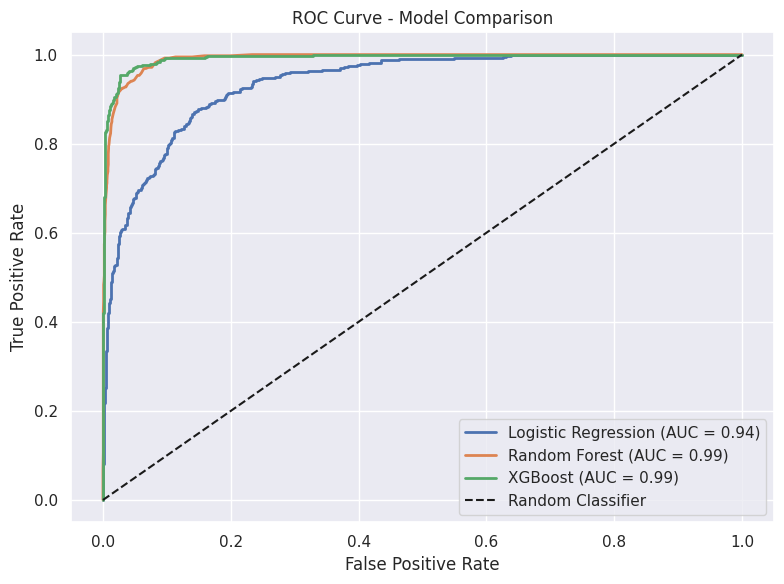

In [49]:
# ROC curve and AUC for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)

lr_auc = roc_auc_score(y_test, lr_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

# Print AUCs
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', linewidth=2)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linewidth=2)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### What I Benefited from the Results
- XGBoost (AUC 0.9931) and Random Forest (AUC 0.9909) outperform Logistic Regression (AUC 0.9376), showing better ability to distinguish between classes.
- Both XGBoost and Random Forest are close to 1, indicating excellent performance on this dataset.
### Model Choice
I choose **XGBoost** due to its slightly higher AUC (0.9931), making it the best model for predicting customer attrition with high accuracy and reliability.